In [56]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# Defining a toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                        [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear regression

In [51]:
class MyLinearRegression:
    def __init__(self):
        # TODO: Define the parameters of the model (weights and biases)
        self.w = torch.zeros(1,requires_grad=True)
        self.b = torch.zeros(1,requires_grad=True)
    
    def forward(self, x):
        # TODO: implement forward computation - compute predictions based on the inputs
        x = self.b + self.w*x
        return x 
    
    def parameters(self):
        # TODO: this function should return a list of parameters of the model
        return [self.b,self.w]
    
    def __call__(self, x):
        # Convenience function
        return self.forward(x)

def mselossfunc(pred, y):
    # TODO: implement the MSE loss function
    e = pred-y
    #return torch.sum(torch.mul(e, torch.transpose(e,-1,0)))/e.shape[0]
    return (pred-y).pow(2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0], dtype=np.float32)
torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print(mselossfunc(torch_inputs,torch_outputs))
print("Testing model: an input of %s gives a prediction:\n %s" % (numpy_inputs, torch_outputs))

tensor(1.6667, grad_fn=<MeanBackward0>)
Testing model: an input of [0. 1. 2.] gives a prediction:
 tensor([0., 0., 0.], grad_fn=<AddBackward0>)


In [52]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # TODO: Step 1 - create torch variables corresponding to features and labels
        x = torch.from_numpy(features)
        y = torch.from_numpy(labels)
        # TODO: Step 2 - compute model predictions and loss
        optimizer.zero_grad()
        pred =model(x) # model.forward(x)
        loss = lossfunc(y,pred)
        # TODO: Step 3 - do a backward pass and a gradient update step
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # A convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/50], Loss: 5.9467
Epoch [11/50], Loss: 1.1699
Epoch [21/50], Loss: 0.3857
Epoch [31/50], Loss: 0.2567
Epoch [41/50], Loss: 0.2352


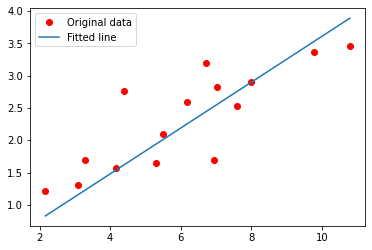

In [53]:
# Training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=50)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

Epoch [1/100], Loss: 54.9957
Epoch [11/100], Loss: 9.2043
Epoch [21/100], Loss: 1.6889
Epoch [31/100], Loss: 0.4552
Epoch [41/100], Loss: 0.2526
Epoch [51/100], Loss: 0.2191
Epoch [61/100], Loss: 0.2135
Epoch [71/100], Loss: 0.2124
Epoch [81/100], Loss: 0.2120
Epoch [91/100], Loss: 0.2117


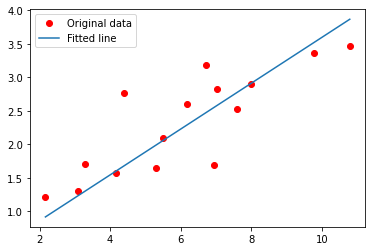

In [55]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # TODO: Define the parameters of the model (linear nn layer)
        self.lin = nn.Linear(1,1,True)
    
    def forward(self, x):
        # TODO: implement forward computation
        x = self.lin(x)
        return x
    
# Training and visualizing predictions made by linear regression model (nn package)
# TODO: use loss function from nn package
lossfunc = torch.nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer, num_epoch=100)
visualize(x_train, y_train, model)

## MLP

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch [1/1000], Loss: 10.5737
Epoch [11/1000], Loss: 0.6722
Epoch [21/1000], Loss: 0.5567
Epoch [31/1000], Loss: 0.5537
Epoch [41/1000], Loss: 0.5524
Epoch [51/1000], Loss: 0.5513
Epoch [61/1000], Loss: 0.5504
Epoch [71/1000], Loss: 0.5496
Epoch [81/1000], Loss: 0.5489
Epoch [91/1000], Loss: 0.5483
Epoch [101/1000], Loss: 0.5477
Epoch [111/1000], Loss: 0.5472
Epoch [121/1000], Loss: 0.5468
Epoch [131/1000], Loss: 0.5463
Epoch [141/1000], Loss: 0.5459
Epoch [151/1000], Loss: 0.5456
Epoch [161/1000], Loss: 0.5452
Epoch [171/1000], Loss: 0.5449
Epoch [181/1000], Loss: 0.5446
Epoch [191/1000], Loss: 0.5442
Epoch [201/1000], Loss: 0.5439
Epoch [211/1000], Loss: 0.5436
Epoch [221/1000], Loss: 0.5433
Epoch [231/1000], Loss: 0.5430
Epoch [241/1000], Loss: 0.5426
Epoch [251/1000], Loss: 0.5423
Epoch [261/1000], Loss: 0.5419
Epoch [271/1000], Loss: 0.5416
Epoch [281/1000], Loss: 0.5412
Epoch [291/1000], Loss: 0.5407
Epoch [301/1000], Loss: 0.5403
Epoch [311/1000], Loss: 0.5398
Epoch [321/1000], 

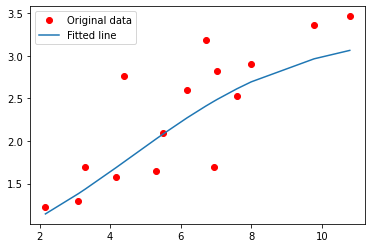

In [81]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # TODO: Define parameters / layers of a multi-layered perceptron with one hidden layer
        self.lin1 = nn.Linear(1,hidden_size,True)
        self.lin2 = nn.Linear(hidden_size,1,True)
    
    def forward(self, x):
        x =  F.sigmoid(self.lin1(x))
        x = self.lin2(x)
        return x
    
# TODO: Play with learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 1
learning_rate = 1e-1
lossfunc = torch.nn.MSELoss()

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)


train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=1000)
visualize(x_train, y_train, model)